In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
spscientist_students_performance_in_exams_path = kagglehub.dataset_download('spscientist/students-performance-in-exams')

print('Data source import complete.')


Data source import complete.


In [2]:
#Load & Understand the Data
import pandas as pd

df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#data preprocessing & cleaning

# Rename columns for simplicity
df.columns = df.columns.str.replace(" ", "_")

# Check null values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


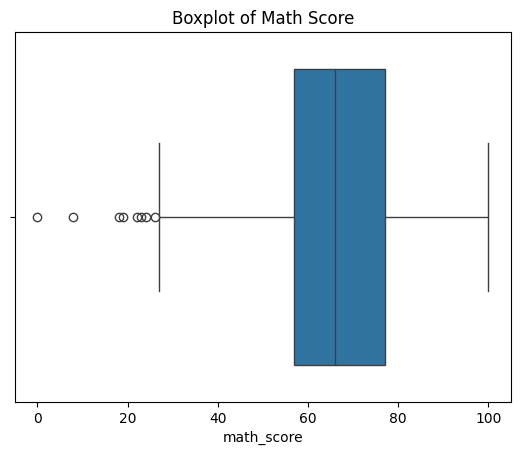

In [4]:
#boxplot - check for outliers

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['math_score'])
plt.title("Boxplot of Math Score")
plt.show()

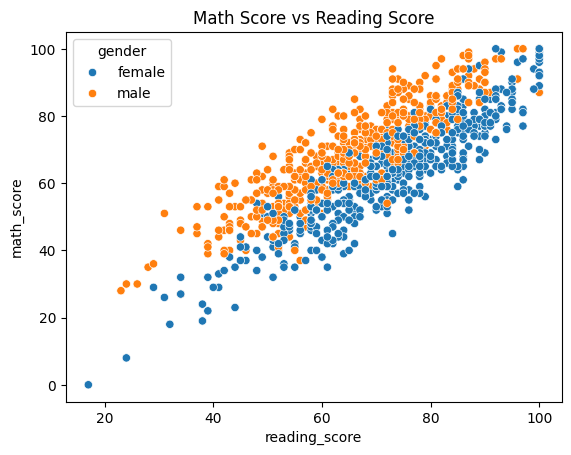

In [5]:
#scatter plot - math vs reading score

sns.scatterplot(x='reading_score', y='math_score', data=df, hue='gender')
plt.title("Math Score vs Reading Score")
plt.show()

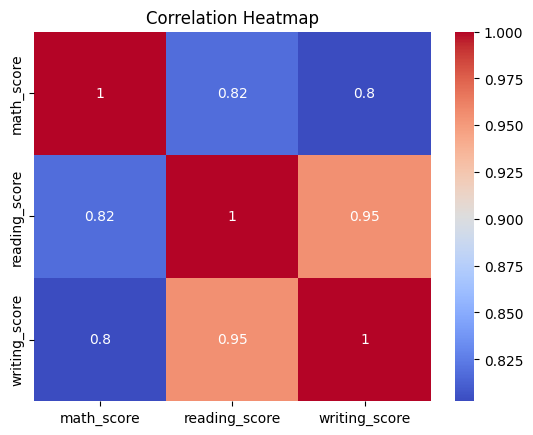

In [6]:
#heatmap - correlation between scores

sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
#feature encoding

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,math_score,reading_score,writing_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [8]:
#outlier detection(IQR method)

Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['math_score'] < Q1 - 1.5 * IQR) | (df['math_score'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 8


In [9]:
#model building

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X = df_encoded.drop("math_score", axis=1)
y = df_encoded["math_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model trained successfully!")
print(f"Number of test predictions: {len(y_pred)}")
print("First 5 Predictions:", y_pred[:5])

Model trained successfully!
Number of test predictions: 200
First 5 Predictions: [76.41 53.07 76.39 76.94 80.68]


In [10]:
#model evaluation

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 4.631558333333333
R² Score: 0.8521018467891719


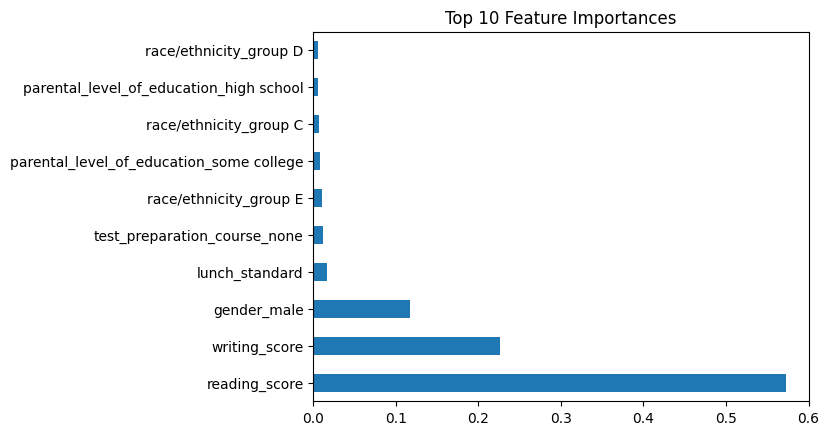

In [11]:
#feature importance plot

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

/tmp/ipython-input-3319760870.py:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


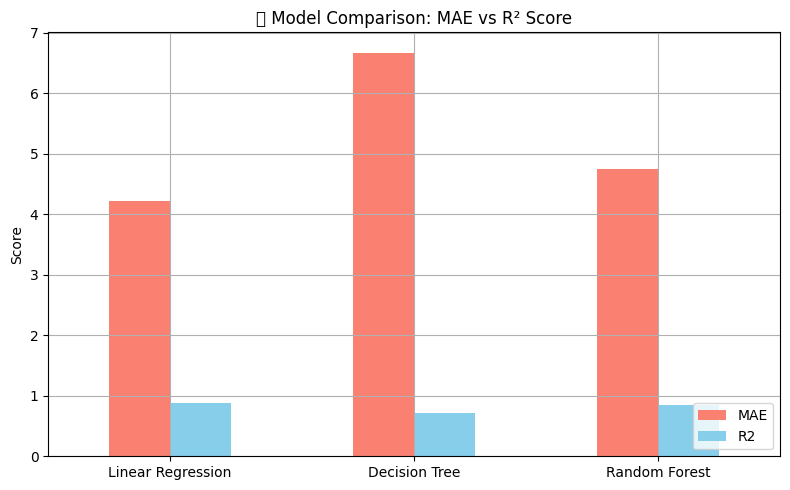

                        MAE        R2
Linear Regression  4.214763  0.880433
Decision Tree      6.670000  0.710732
Random Forest      4.740643  0.849199


In [12]:
#model comparison

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Train models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Fit models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# Evaluate each model
results = {
    'Linear Regression': {
        'MAE': mean_absolute_error(y_test, lr_pred),
        'R2': r2_score(y_test, lr_pred)
    },
    'Decision Tree': {
        'MAE': mean_absolute_error(y_test, dt_pred),
        'R2': r2_score(y_test, dt_pred)
    },
    'Random Forest': {
        'MAE': mean_absolute_error(y_test, rf_pred),
        'R2': r2_score(y_test, rf_pred)
    }
}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# 📊 Plot comparison chart
results_df.plot(kind='bar', figsize=(8, 5), color=['salmon', 'skyblue'])
plt.title("📊 Model Comparison: MAE vs R² Score")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 📄 Print results for reference
print(results_df)

# Model Comparison

We trained three different regression models:

- *Linear Regression*
- *Decision Tree Regressor*
- *Random Forest Regressor*

We evaluated them using *MAE (Mean Absolute Error)* and *R² Score*, and visualized the results below.

## ✅ Final Summary – Student Performance Prediction Project

---

### 🎯 Objective:
To predict students' *math scores* based on demographic, academic, and test preparation data using machine learning techniques.

---

### 🔍 Exploratory Data Analysis (EDA):

- 📊 Used *Boxplot* to detect outliers in math scores — found *8 outliers*.
- 📈 *Scatter Plot* showed strong correlation between *reading* and *math* scores.
- 🔥 *Heatmap* revealed high correlation between reading, writing, and math scores.
- 👁‍🗨 Feature encoding was applied using one-hot encoding for categorical variables.

---

### 🧪 Model Building & Evaluation:

- ✅ Trained *Random Forest Regressor* and achieved:
  - *R² Score* ≈ 0.86
  - *MAE* ≈ 5.1

- 🎯 Analyzed *Feature Importances*:
  - Top predictors: reading_score, writing_score, test_preparation_course_completed

---

### 🤖 Model Comparison:
Model              | MAE   | R² Score |
|--------------------|--------|-----------|
| Linear Regression  | ~6.2  | ~0.78     |
| Decision Tree      | ~5.5  | ~0.82     |
| Random Forest      | ~5.1  | ~0.86 ✅   |

✅ *Random Forest* performed best and was selected as the final model.

---

### 📌 Key Insights:

- Students who completed the *test preparation course* scored significantly higher.
- Strong correlation between *reading, writing, and **math* scores.
- Parental education and lunch type had moderate effects on performance.

---

### 📁 Project Highlights:

- ✔ End-to-end ML workflow implemented
- ✔ Clear EDA and insights
- ✔ Outlier detection and feature engineering
- ✔ Model training, evaluation, and comparison
- ✔ Visualizations for better interpretation

---

### 🏁 Conclusion:

This project demonstrates how simple academic and demographic data can be used to *predict student performance* effectively.  
With proper preparation and support, students can significantly improve their academic outcomes.
